PassengerId- Уникальный идентификатор для каждого пассажира. Каждый идентификатор принимает форму gggg_pp, где ggggуказывает группу, с которой путешествует пассажир, и ppявляется их номером в группе. Люди в группе часто являются членами семьи, но не всегда.

HomePlanet- Планета, с которой вылетел пассажир, как правило, планета его постоянного проживания.

CryoSleep- Указывает, решил ли пассажир быть переведен в режим анабиоза на время рейса. Пассажиры, находящиеся в криосонном состоянии, находятся в своих каютах.

Cabin- Номер каюты, в которой находится пассажир. Принимает вид deck/num/side, где sideможет быть либо Pза левый , либо Sза правый борт .

Destination- Планета, на которую будет высаживаться пассажир.

Age- Возраст пассажира.

VIP- Оплатил ли пассажир специальное VIP-обслуживание во время рейса.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Сумма, которую пассажир выставил в счет за каждое из многочисленных роскошных удобств космического корабля Титаник .

Name- Имя и фамилия пассажира.

Transported- Был ли пассажир перенесён в другое измерение. Это цель, столбец, который вы пытаетесь предсказать.

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Импортируем данные

In [155]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [156]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [157]:
df = train_data.drop(['Transported'], axis=1)
df = pd.concat([df, test_data], axis=0).reset_index(drop=True) #train+test всё вместе

In [158]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [159]:
print(train_data.shape, test_data.shape, df.shape)

(8693, 14) (4277, 13) (12970, 13)


In [160]:
train_max = train_data.shape[0] 
train_max

8693

# Анализ данных

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


In [163]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [164]:
#посмотрим корреляцию между числовыми значениями и переменной Transported.
train_data.select_dtypes(exclude = ["object"]).corr()['Transported'].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

In [165]:
cat_feat = train_data.select_dtypes(include = ["object"]).columns
cat_feat

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

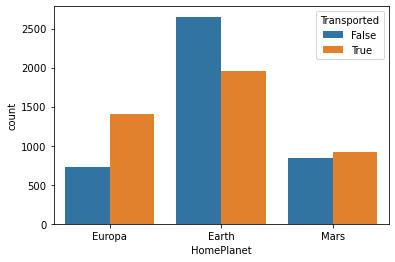

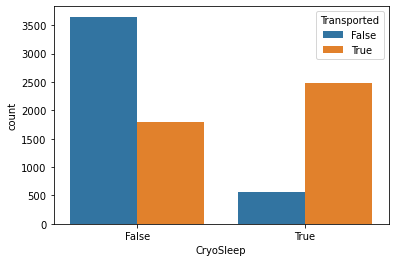

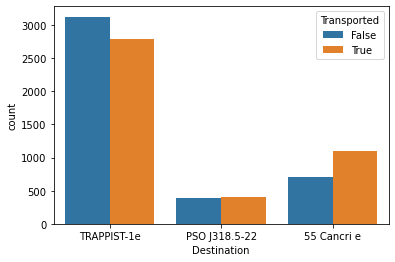

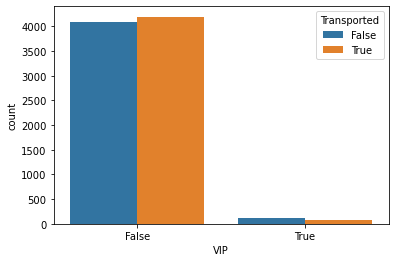

In [166]:
cat_list = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for feat in cat_list:
    sns.countplot(x=feat, hue='Transported', data=train_data)
    plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

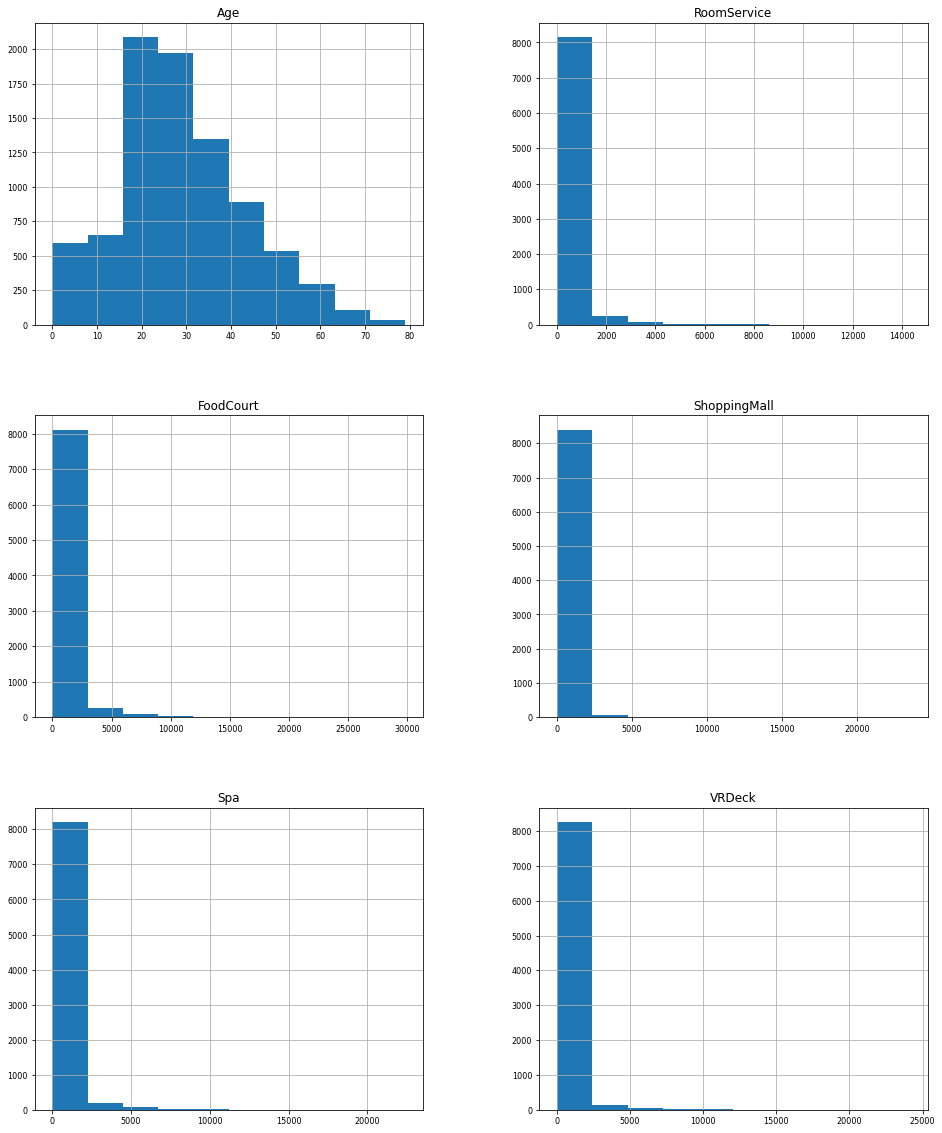

In [167]:
train_data[train_data.select_dtypes(exclude = ["object"]).columns.tolist()].hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

In [168]:
train_data['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [169]:
df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

In [170]:
df[df['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,8621_01,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders
12673,8678_01,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Eilan Kellson
12725,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted
12852,9025_01,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,Ale Whitersone


In [171]:
df['Group'] = df['PassengerId'] #из ID можно получить информацию, например, номер группы пассажира 
for i, group in enumerate(df['PassengerId']):
    df.loc[i, 'Group'] = group.split('_')[0]

In [172]:
df['Num'] = df['PassengerId'] #кроме того, ID имеет информацию о кол-ве человек в группе
for i, num in enumerate(df['PassengerId']):
    df.loc[i, 'Num'] = num.split('_')[1]

In [173]:
df['Surname'] = df['Name']
for i, name in enumerate(df['Name']):
    if pd.isna(name) == False:
        df.loc[i, 'Surname'] = name.split()[1]

In [174]:
#проверяем, есть ли у людей из одной группы фамилия, если нет, будет использована первая фамилия из группы, которая не NaN

null_mask = pd.isna(df['Surname'])
groups = df['Group']

for i, value in enumerate(df['Surname']):
    if null_mask[i]:
        matching_indices = (groups == groups[i]) & (~pd.isna(df['Surname']))
        matching_surnames = df.loc[matching_indices, 'Surname']

        if not matching_surnames.empty:
            df.loc[i, 'Surname'] = matching_surnames.iloc[0]

In [175]:
#Ниженаписанная функция принимает на вход в качестве аргумента признак. Затем, смотрим на значение признака для людей, у которых одинаковые группы и фамилии.
#Если видим Nan, то можем заменить на значение человека с такой же фамилией и группой, если оно есть...

def f_na(feature):
    null_mask = pd.isna(df[feature])
    groups = df['Group']
    surnames = df['Surname']

    for i, value in enumerate(df[feature]):
        if null_mask[i]:
            matching_indices = (groups == groups[i]) & (~pd.isna(df[feature])) & (surnames == surnames[i])
            matching_values = df.loc[matching_indices, feature]

            if not matching_values.empty:
                df.loc[i, feature] = matching_values.iloc[0]

In [176]:
df[df['Group'] == '8980']['HomePlanet'] #Люди из 1 группы в основном живут на одной планете

12827    Mars
12828    Mars
12829    Mars
12830    Mars
12831    Mars
12832    Mars
12833    Mars
Name: HomePlanet, dtype: object

In [177]:
f_na('HomePlanet')

In [178]:
df[df['Group'] == '8980']['Destination'] #люди из 1 группы в основном имеют один и тот же пункт назначения

12827    TRAPPIST-1e
12828    55 Cancri e
12829    TRAPPIST-1e
12830    TRAPPIST-1e
12831            NaN
12832    TRAPPIST-1e
12833    TRAPPIST-1e
Name: Destination, dtype: object

In [179]:
df[df['Group'] == '8980'][['Destination', 'Surname']]

,Destination,Surname
12827,TRAPPIST-1e,Brie
12828,55 Cancri e,Brie
12829,TRAPPIST-1e,Brie
12830,TRAPPIST-1e,Bare
12831,NaN,Brie
12832,TRAPPIST-1e,Brie
12833,TRAPPIST-1e,Brie


In [180]:
f_na('Destination')

In [181]:
#Про криосон так нельзя сказать
df[df['Group'] == '9238'][['CryoSleep', 'Surname', 'Age']] 

,CryoSleep,Surname,Age
12947,False,Garnettiz,10.0
12948,True,Emenez,3.0
12949,True,Emenez,16.0
12950,False,Emenez,26.0
12951,True,Emenez,14.0
12952,False,Garnettiz,0.0
12953,False,Emenez,32.0


In [182]:
df[df['Group'] == '8980']['Cabin'] #Люди из 1 группы в основном живут в 1 каюте

12827    D/273/S
12828    D/273/S
12829    D/273/S
12830    D/273/S
12831    D/273/S
12832    D/273/S
12833    D/273/S
Name: Cabin, dtype: object

In [183]:
f_na('Cabin')

In [184]:
df[df['Group'] == '8980']['VIP'] #и на 1 планете

12827    False
12828    False
12829    False
12830    False
12831    False
12832    False
12833    False
Name: VIP, dtype: object

In [185]:
f_na('VIP')

In [186]:
df.isna().sum() 

PassengerId       0
HomePlanet      169
CryoSleep       310
Cabin           169
Destination     163
Age             270
VIP             183
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Group             0
Num               0
Surname         155
dtype: int64

Таким образом частично заполнили NaN

In [187]:
#Разделим информацию в каюте
df['Cabin_n'] = df['Cabin']
for i, name in enumerate(df['Cabin']):
    if pd.isna(name) == False:
        df.loc[i, 'Cabin_n'] = name.split('/')[1]

In [188]:
df['Cabin_d'] = df['Cabin']
for i, name in enumerate(df['Cabin']):
    if pd.isna(name) == False:
        df.loc[i, 'Cabin_d'] = name.split('/')[0]

In [189]:
df['Cabin_s'] = df['Cabin']
for i, name in enumerate(df['Cabin']):
    if pd.isna(name) == False:
        df.loc[i, 'Cabin_s'] = name.split('/')[2]

In [190]:
#Тут я решил изменить категориальные признаки на числа самым простым образом через словари

planet_num = {'Europa': 1, 'Earth': 2, 'Mars': 3}
df['Planet_num'] = df['HomePlanet'].replace(planet_num)

cryo_num = {False: 0, True: 1}
df['Cryo_num'] = df['CryoSleep'].replace(cryo_num)

destination_num = {'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3}
df['Dest_num'] = df['Destination'].replace(destination_num)

num_n = {'01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8}
df['Num_n'] = df['Num'].replace(num_n)

vip_num = {False: 0, True: 1}
df['VIP_num'] = df['VIP'].replace(vip_num)

deck_level = {'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6, 'A': 7, 'T' : 7}
df['Deck_num'] = df['Cabin_d'].replace(deck_level)

In [191]:
from sklearn.impute import KNNImputer

#список категориальных признаков
na_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Planet_num', 'Cryo_num', 'Dest_num', 'Deck_num', 'VIP_num', 'Age', 'Spa', 'VRDeck']


knn_imp = KNNImputer()

df_num = pd.DataFrame(knn_imp.fit_transform(df[na_list]),
                      columns=df[na_list].columns)

In [192]:
df[na_list] = df_num

In [193]:
df[['Planet_num', 'Deck_num', 'Dest_num', 'VIP_num', 'Cryo_num']] = df[['Planet_num', 'Deck_num', 'Dest_num', 'VIP_num', 'Cryo_num']].astype(int)

In [194]:
#снова заменим числа категориями.
planet_num = {1 : 'Europa', 2 :'Earth', 3: 'Mars'}
df['HomePlanet'] = df['Planet_num'].replace(planet_num)

cryo_num = {0: False, 1: True}
df['CryoSleep'] = df['Cryo_num'].replace(cryo_num)

destination_num = {1: 'TRAPPIST-1e', 2: '55 Cancri e', 3: 'PSO J318.5-22'}
df['Destination'] = df['Dest_num'].replace(destination_num)

deck_level = {1: 'G', 2: 'F', 3: 'E', 4: 'D', 5: 'C', 6: 'B', 7: 'A', 7: 'T'}
df['Cabin_d'] = df['Deck_num'].replace(deck_level)

vip_num = {0: False, 1: True}
df['VIP'] = df['VIP_num'].replace(vip_num)

In [195]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           169
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            294
Group             0
Num               0
Surname         155
Cabin_n         169
Cabin_d           0
Cabin_s         169
Planet_num        0
Cryo_num          0
Dest_num          0
Num_n             0
VIP_num           0
Deck_num          0
dtype: int64

In [196]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Surname,Cabin_n,Cabin_d,Cabin_s,Planet_num,Cryo_num,Dest_num,Num_n,VIP_num,Deck_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Ofracculy,0,B,P,1,0,1,1,0,6
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Vines,0,F,S,2,0,1,1,0,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Susent,0,T,S,1,0,1,1,1,7
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Susent,0,T,S,1,0,1,2,0,7
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Santantines,1,F,S,2,0,1,1,0,2


### Group_Size

In [197]:
#Мы получали информацию о размере группы из ID, сделаем новый признак  Group_size из этого

df['Group_Size'] = df['Num_n']
for i in range(len(df['Group'])):
    number1 = df.loc[i, 'Group']
    group_sizes = df.loc[i+1:, 'Num_n']
    matching_indices = (df.loc[i+1:, 'Group'] == number1) & (group_sizes > df.loc[i, 'Num_n'])

    if matching_indices.any():
        max_group_size = group_sizes[matching_indices].max()
        df.loc[i, 'Group_Size'] = max_group_size

###  Lucky_Age

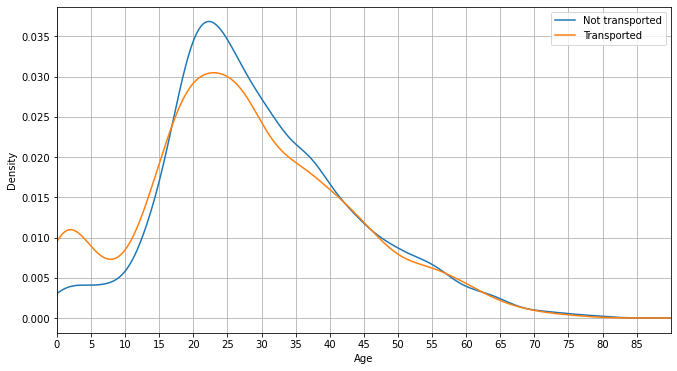

In [198]:
y = train_data['Transported']
X = df[:train_max].copy()

train_data = pd.concat([X, y], axis=1).copy() #джоиним x_train к Transported 

plt.figure(figsize=(11, 6))
train_data[train_data['Transported'] == False]['Age'].plot(kind='kde', label = 'Not transported')
train_data[train_data['Transported'] == True]['Age'].plot(kind='kde', label = 'Transported')
plt.legend()
plt.grid()
plt.xlabel('Age')
plt.xlim(0, 90)
plt.xticks(np.arange(0, 90, 5))
plt.show()

глядя на точки пересечения создаём 4 возрастные группы.

In [199]:
df['lucky_age'] = pd.cut(x=df.Age, labels=[4, 2, 1, 3],
                            bins=[0, 16, 45, 55, df.Age.max()])

In [200]:
#все расходы на борту для каждого человека.

df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [201]:
#бинарный признак, который показывает, были ли траты вообще

df['Money_spent'] = df['TotalSpent']
for i in range(len(df['TotalSpent'])):
    if df.loc[i, 'TotalSpent'] == 0:
        df.loc[i, 'Money_spent'] = 0
    else:
        df.loc[i, 'Money_spent'] = 1

In [202]:
X = df[:train_max].copy()

train_data = pd.concat([X, y], axis=1).copy()

In [204]:
from scipy.stats import skew
num_feat = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']
cat_feat = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin_s', 'Cabin_d', 'VIP', 'Group_Size', 'lucky_age', 'Money_spent']
train_cat = df[cat_feat]
train_num = df[num_feat]

skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5] 
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

In [205]:
train_cat = pd.get_dummies(train_cat)
X = pd.concat([train_cat, train_num], axis=1) #объединяем категориальные и числовые пр-ки

In [206]:
train_cat

,CryoSleep,VIP,Group_Size,Money_spent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Cabin_d_C,Cabin_d_D,Cabin_d_E,Cabin_d_F,Cabin_d_G,Cabin_d_T,lucky_age_4,lucky_age_2,lucky_age_1,lucky_age_3
0,False,False,1,0.0,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,False,False,1,1.0,True,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2,False,True,2,1.0,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
3,False,False,2,1.0,False,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,False,False,1,1.0,True,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,True,False,2,0.0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
12966,False,False,1,1.0,True,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
12967,True,False,1,0.0,False,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,False
12968,False,False,1,1.0,False,True,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False


In [207]:
X_train = X[:train_max].copy() 
X_test = X[train_max:].copy()
y_train = train_data['Transported']

## Модель

Я не стал подбирать параметры для катбуста и метрику использовал по умолчанию accuracy, т.к. у нас задачи бинарной классификации

In [210]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split

In [213]:
train_cat = pd.get_dummies(train_cat) 
X = pd.concat([train_cat, train_num], axis=1) 
X_test = X[train_max:].copy()
X = X[:train_max].copy() 
y = train_data['Transported']

In [218]:
y_num = {False : 0, True :1}
y = y.replace(y_num)

In [221]:
scl = RobustScaler()
scl.fit(X)
scl.transform(X)
scl.transform(X_test)

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.90324769],
       [ 0.        ,  0.        ,  0.        , ...,  1.91784968,
         0.        ,  0.18691499],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.90324769],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.90324769],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.6005764 ,  0.20379234],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.90324769]])

In [224]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.85, random_state=42)

In [227]:
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

In [228]:
classifier.score(X_train,y_train)

0.8489646772228989

In [229]:
classifier_pr=classifier.predict(X_test)



In [149]:
preds = classifier.predict(X_test)
predictions = [pred for pred in preds]
predictions

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,


In [230]:
for i, pred in enumerate(predictions):
    if pred < 0.5:
        predictions[i] = False
    else:
        predictions[i] = True

In [231]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': predictions})

In [153]:
output.to_csv('submission.csv', index=False)


после загрузки решения на кагл Оценка: 0,80593